# Test for the ProbabilistDataFrame class

## 1. Imports

In [31]:
from utilities.data.lvm import lvm_to_df
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI 
from ProbabilisticDataFrame import ProbabilisticDataFrame # A renommer le fichier hein...
import numpy as np

## 2. Get Data

In [32]:
#####BASE DE DONNEES INDEPENDANTE ETALONNAGE#####
df = lvm_to_df(r".\exemples\PPh_359.lvm")
df.drop(columns=["Comment"],inplace=True)

## 3. Instanciate pdf

In [33]:
df_mean = df.mean()
udf = df.std()
pdf = ProbabilisticDataFrame(df_mean,udf)

## 4. Test : propagate enthalpy !

In [34]:
H = np.vectorize(lambda P,T : PropsSI('H', 'P', P*1E5, 'T', T+273.15, 'R245fa'))
Hexp = "[H(a, b).tolist() for a, b in zip(X0,X1)]"

In [35]:
pdf.propagate(Xk=['202 - E_in_imm [°C]','118 - P_TS_in [bars]'],
              exp=['H_TS_in [J/kg]',Hexp],alpha=0.05)

pdf.propagate(Xk=['218 - E_out_imm [°C]','114 - P_TS_out [bars]'],
              exp=['H_TS_out [J/kg]',Hexp],alpha=0.05)

pdf.propagate(Xk=['105 - mass [kg/s]','H_TS_in [J/kg]','H_TS_out [J/kg]'],
              exp=['P_th [W]',"X0*(X2 - X1)"],alpha=0.05)

In [36]:
pdf.df['P_th [W]']

0   -0.401531
Name: P_th [W], dtype: float64

In [37]:
pdf.udf['P_th [W]']

0    0.033688
Name: P_th [W], dtype: float64

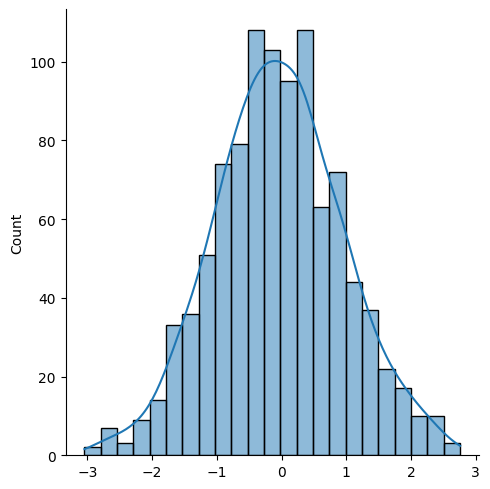

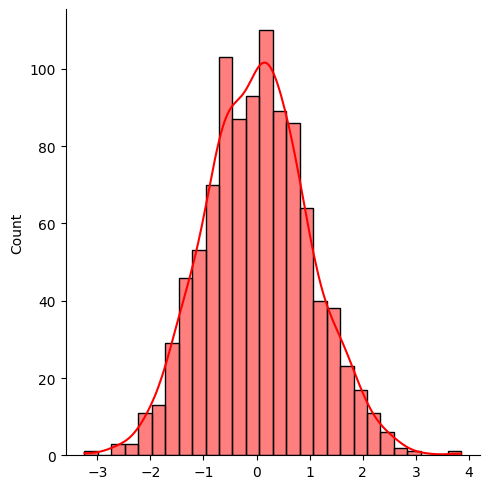

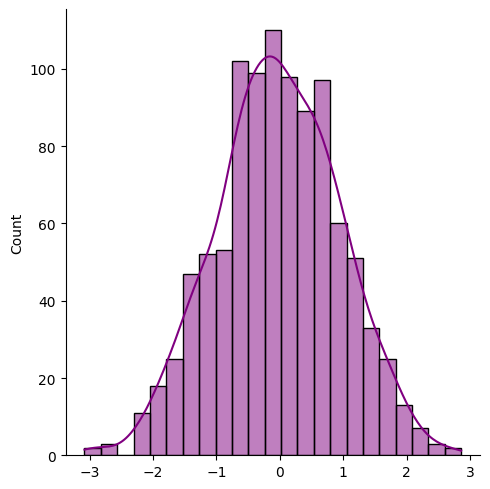

In [6]:
import numpy as np
import seaborn as sns

#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(x, kde=True).set_titles('Variable 1')

#make this example reproducible
np.random.seed(42)

#create data
x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(x, kde=True,color='r').set_titles('Variable 2')

#make this example reproducible
np.random.seed(7)

#create data
x = np.random.normal(size=1000)

#create normal distribution curve
sns.displot(x, kde=True,color='purple').set_titles('Variable 2')
